In [2]:
# Import necessary libraries
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import calendar
from cartopy.util import add_cyclic_point

In [3]:
# Load the dataset
file= r'C:\Github\Lab_work\CLIM680\Data\GPCP_NOAA_precip.mon.mean.nc'


In [4]:

# Load the dataset with error handling
try:
    ds = xr.open_dataset(file)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    raise FileNotFoundError(f"Error: File not found at {file}")


Dataset loaded successfully.


In [5]:
ds

<xarray.Dataset> Size: 23MB
Dimensions:    (lat: 72, lon: 144, time: 550, nv: 2)
Coordinates:
  * lat        (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon        (lon) float32 576B 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
  * time       (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2024-10-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] 9kB ...
    lat_bnds   (lat, nv) float32 576B ...
    lon_bnds   (lon, nv) float32 1kB ...
    precip     (time, lat, lon) float32 23MB ...
Attributes: (12/18)
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    ...                    ...
    source:                https://www.ncei.noaa.gov/data/global-precipitatio...
    source_documentation:  https://www.ncdc.noaa.gov/cdr/atmospheric/precipit...
    NCO:                   4.6.9
    history:               Generated at NOAA/ESRL PSD Sep 9 2016 based on dat...
    References:            http://www.psl.noaa.gov/data/gridded/data.gpcp.html
    data_comment:          Interim data covers 2024/09 through latest.

In [6]:

# Resample and group the data
ds_monthly = ds.resample(time='M').mean()
ds_month = ds_monthly.groupby('time.month').mean()
ds_month

c:\Users\dveronez\AppData\Local\anaconda3\envs\climate\Lib\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


<xarray.Dataset> Size: 519kB
Dimensions:   (month: 12, lat: 72, nv: 2, lon: 144)
Coordinates:
  * lat       (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon       (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * month     (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nv
Data variables:
    lat_bnds  (month, lat, nv) float32 7kB -90.0 -87.5 -87.5 ... 87.5 87.5 90.0
    lon_bnds  (month, lon, nv) float32 14kB 0.0 2.5 2.5 ... 357.5 357.5 360.0
    precip    (month, lat, lon) float32 498kB 0.02275 0.03124 ... 0.3998 0.3535
Attributes: (12/18)
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    ...                    ...
    source:                https://www.ncei.noaa.gov/data/global-precipitatio...
    source_documentation:  https://www.ncdc.noaa.gov/cdr/atmospheric/precipit...
    NCO:                   4.6.9
    history:               Generated at NOAA/ESRL PSD Sep 9 2016 based on dat...
    References:            http://www.psl.noaa.gov/data/gridded/data.gpcp.html
    data_comment:          Interim data covers 2024/09 through latest.

In [7]:
print("Maximum Precipitation:", ds_month['precip'].max().values)
print("Minimum Precipitation:", ds_month['precip'].min().values)

Maximum Precipitation: 29.965757
Minimum Precipitation: 0.00082266284


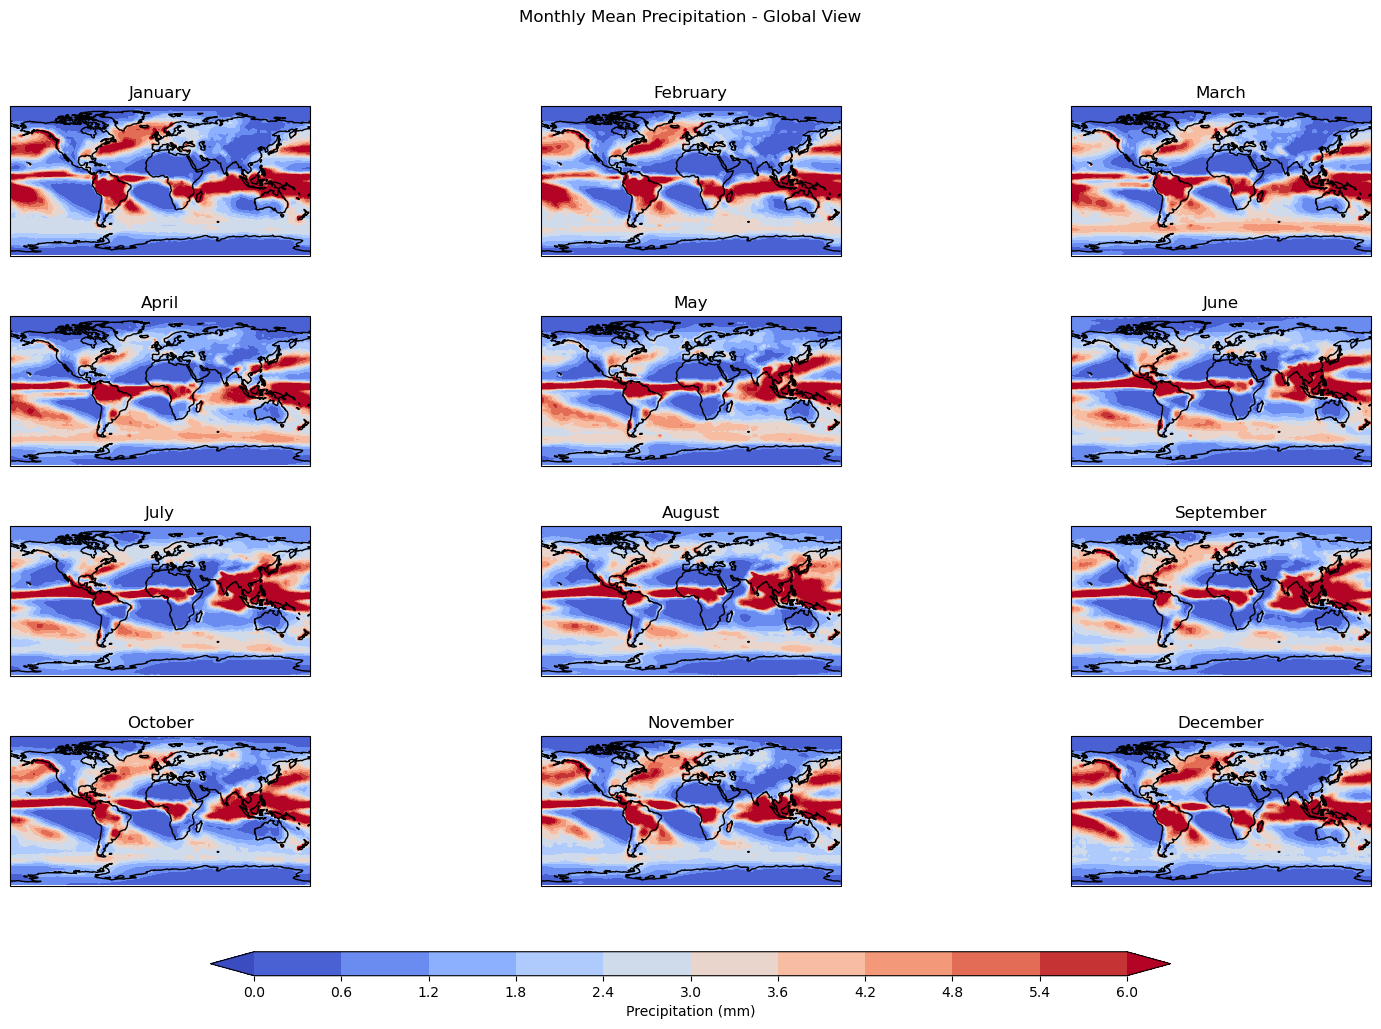

In [13]:
# Set the color range manually to a fixed range (0 to 6)
clevs = np.linspace(0, 6, 11)

# Define the figure for 4 rows and 3 columns
fig, axs = plt.subplots(nrows=4, ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(16, 12))
axs = axs.flatten()

# Plot each month's data
for i, month in enumerate(ds_month['month']):
    data = ds_month['precip'].sel(month=month)

    # Add a cyclic point for plotting
    data, lons = add_cyclic_point(data, coord=ds_month['lon'])

    # Contour plot with adjusted range
    cs = axs[i].contourf(lons, ds_month['lat'], data, clevs,
                         transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')

    # Title each subplot with the month's name
    month_name = calendar.month_name[month.values]
    axs[i].set_title(month_name)

    # Draw coastlines
    axs[i].coastlines()

    # Set global extent
    axs[i].set_global()

# Adjust the layout to include a colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.4, hspace=0.4)

# Add colorbar with updated label
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal',
                    label='Precipitation (mm)', ticks=np.linspace(0, 6, 11))

# Add a main title
plt.suptitle('Monthly Mean Precipitation - Global View')

plt.show()


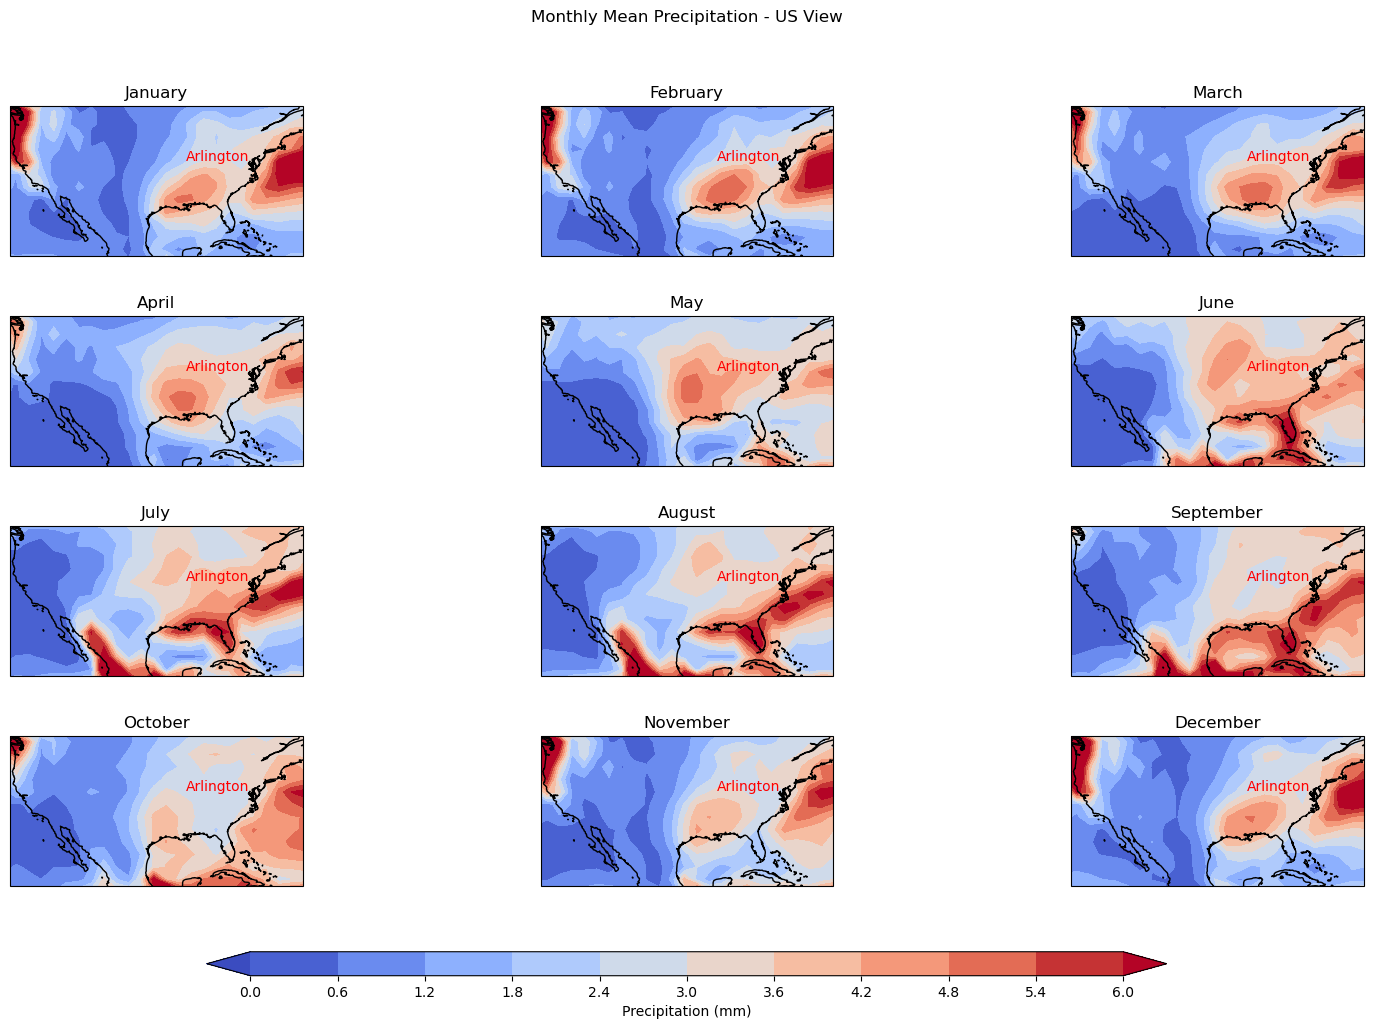

In [17]:
# Set the color range manually to a fixed range (0 to 6)
clevs = np.linspace(0, 6, 11)

# Define the figure for 4 rows and 3 columns
fig, axs = plt.subplots(nrows=4, ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(16, 12))
axs = axs.flatten()

# Plot each month's data
for i, month in enumerate(ds_month['month']):
    data = ds_month['precip'].sel(month=month)

    # Add a cyclic point for plotting
    data, lons = add_cyclic_point(data, coord=ds_month['lon'])

    # Contour plot with adjusted range
    cs = axs[i].contourf(lons, ds_month['lat'], data, clevs,
                         transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')

    # Title each subplot with the month's name
    month_name = calendar.month_name[month.values]
    axs[i].set_title(month_name)

    # Draw coastlines
    axs[i].coastlines()

    # Set US extent
    axs[i].set_extent([-125, -66.5, 20, 50], crs=ccrs.PlateCarree())

    # Add Arlington label near the location 
    axs[i].text(-77.1, 38.9, 'Arlington', horizontalalignment='right',
                transform=ccrs.PlateCarree(), color='red')

# Adjust the layout to include a colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.4, hspace=0.4)

# Add colorbar with updated label
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal',
                    label='Precipitation (mm)', ticks=np.linspace(0, 6, 11))

# Add a main title
plt.suptitle('Monthly Mean Precipitation - US View')

plt.show()

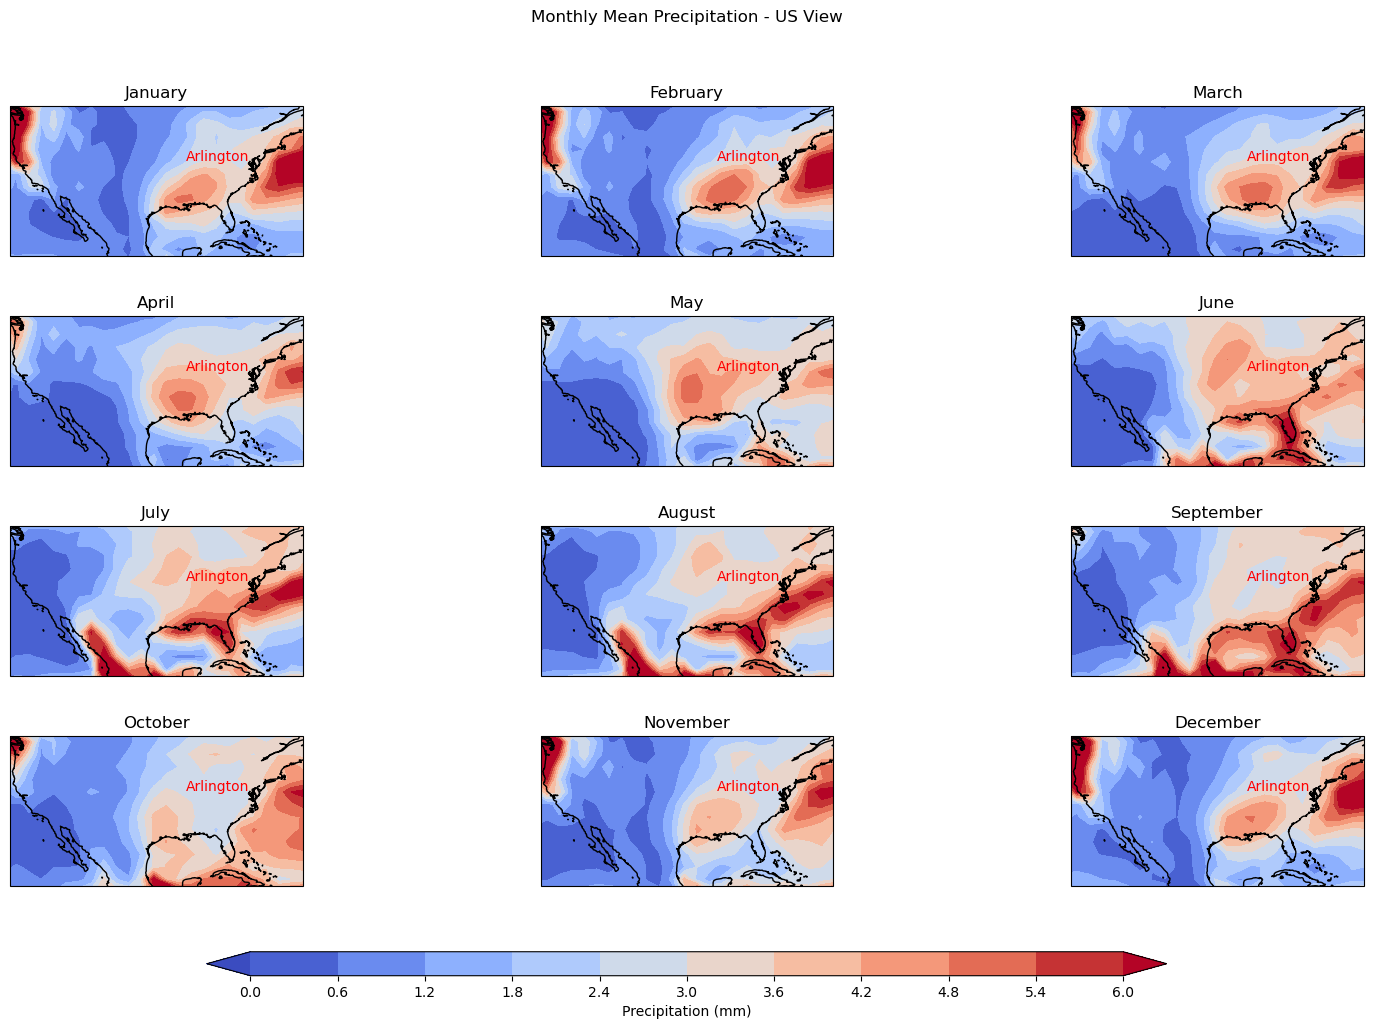

C:\Users\dveronez\AppData\Local\Temp\ipykernel_14940\3609457697.py:76: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


NameError: name 'os' is not defined

In [18]:
import imageio

# Set the color range manually to a fixed range (0 to 6)
clevs = np.linspace(0, 6, 11)

# Define the figure for 4 rows and 3 columns
fig, axs = plt.subplots(nrows=4, ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(16, 12))
axs = axs.flatten()

# Plot each month's data
for i, month in enumerate(ds_month['month']):
    data = ds_month['precip'].sel(month=month)

    # Add a cyclic point for plotting
    data, lons = add_cyclic_point(data, coord=ds_month['lon'])

    # Contour plot with adjusted range
    cs = axs[i].contourf(lons, ds_month['lat'], data, clevs,
                         transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')

    # Title each subplot with the month's name
    month_name = calendar.month_name[month.values]
    axs[i].set_title(month_name)

    # Draw coastlines
    axs[i].coastlines()

    # Set US extent
    axs[i].set_extent([-125, -66.5, 20, 50], crs=ccrs.PlateCarree())

    # Add Arlington label near the location 
    axs[i].text(-77.1, 38.9, 'Arlington', horizontalalignment='right',
                transform=ccrs.PlateCarree(), color='red')

# Adjust the layout to include a colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.4, hspace=0.4)

# Add colorbar with updated label
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal',
                    label='Precipitation (mm)', ticks=np.linspace(0, 6, 11))

# Add a main title
plt.suptitle('Monthly Mean Precipitation - US View')

plt.show()

#make a gif of the plots
# Create a list to store the file names of the plots
filenames = []

# Generate and save each plot as an image file
for i, month in enumerate(ds_month['month']):
    data = ds_month['precip'].sel(month=month)
    data, lons = add_cyclic_point(data, coord=ds_month['lon'])

    fig, ax = plt.subplots(figsize=(10, 7), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.contourf(lons, ds_month['lat'], data, clevs, transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')
    ax.coastlines()
    ax.set_extent([-125, -66.5, 20, 50], crs=ccrs.PlateCarree())
    ax.text(-77.1, 38.9, 'Arlington', horizontalalignment='right', transform=ccrs.PlateCarree(), color='red')
    ax.set_title(calendar.month_name[month.values])
    
    # Save the plot as an image file
    filename = f'monthly_precipitation_{month.values}.png'
    plt.savefig(filename)
    filenames.append(filename)
    plt.close()

# Create a gif from the saved images
with imageio.get_writer('monthly_precipitation.gif', mode='I', duration=1) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Remove the image files after creating the gif
for filename in filenames:
    os.remove(filename)
 
